In [1]:
import requests
from datetime import date,datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile, io
%matplotlib inline


C:\Users\lyqqyl010701\AppData\Local\Temp\ipykernel_13404\3554351827.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
## 当前交易对
Info = requests.get('https://fapi.binance.com/fapi/v1/exchangeInfo')
symbols = [s['symbol'] for s in Info.json()['symbols']]
symbols = list(filter(lambda x: x[-4:] == 'USDT', [s.split('_')[0] for s in symbols]))
print(symbols)


['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [3]:
symbols = symbols[:100]

In [4]:
# #获取任意周期K线的函数
# def GetKlines(symbol='BTCUSDT',start='2020-8-10',end='2021-8-10',period='1h',base='fapi',v = 'v1'):
#     Klines = []
#     start_time = int(time.mktime(datetime.strptime(start, "%Y-%m-%d").timetuple()))*1000 + 8*60*60*1000
#     end_time =  min(int(time.mktime(datetime.strptime(end, "%Y-%m-%d").timetuple()))*1000 + 8*60*60*1000,time.time()*1000)
#     intervel_map = {'m':60*1000,'h':60*60*1000,'d':24*60*60*1000}
#     while start_time < end_time:
#         mid_time = start_time+1000*int(period[:-1])*intervel_map[period[-1]]
#         url = 'https://'+base+'.binance.com/'+base+'/'+v+'/klines?symbol=%s&interval=%s&startTime=%s&endTime=%s&limit=1000'%(symbol,period,start_time,mid_time)
#         res = requests.get(url)
#         res_list = res.json()
#         if type(res_list) == list and len(res_list) > 0:
#             start_time = res_list[-1][0]+int(period[:-1])*intervel_map[period[-1]]
#             Klines += res_list
#         if type(res_list) == list and len(res_list) == 0:
#             start_time = start_time+1000*int(period[:-1])*intervel_map[period[-1]]
#         if mid_time >= end_time:
#             break
#     df = pd.DataFrame(Klines,columns=['time','open','high','low','close','amount','end_time','volume','count','buy_amount','buy_volume','null']).astype('float')
#     df.index = pd.to_datetime(df.time,unit='ms')
#     return df


In [5]:
# start_date = '2023-12-01'
# end_date = '2024-02-10'
# period = '1h'
# df_dict = {}
# for symbol in symbols:
#     df_s = GetKlines(symbol=symbol,start=start_date,end=end_date,period=period,base='fapi',v='v1')
#     if not df_s.empty:
#         df_dict[symbol] = df_s


In [6]:
# symbols = list(df_dict.keys())
# print(df_s.columns)


In [7]:
# import pickle
# with open('save_data.pickle', 'wb') as f:
#     pickle.dump(df_dict,f)

In [8]:
import pickle
with open('save_data.pickle', 'rb') as f:
    df_dict = pickle.load(f)

In [9]:
df_dict

{'BTCUSDT':                              time     open     high      low    close  \
 time                                                                    
 2023-12-01 00:00:00  1.701389e+12  37716.9  37734.6  37600.0  37665.6   
 2023-12-01 01:00:00  1.701392e+12  37665.5  37960.0  37626.6  37927.3   
 2023-12-01 02:00:00  1.701396e+12  37927.4  38070.0  37852.1  37977.8   
 2023-12-01 03:00:00  1.701400e+12  37977.9  38056.8  37933.4  38030.2   
 2023-12-01 04:00:00  1.701403e+12  38030.1  38236.6  38005.9  38170.5   
 ...                           ...      ...      ...      ...      ...   
 2024-02-13 05:00:00  1.707800e+12  49922.5  50079.4  49833.6  50072.3   
 2024-02-13 06:00:00  1.707804e+12  50072.3  50127.0  49979.0  50027.8   
 2024-02-13 07:00:00  1.707808e+12  50027.7  50143.6  49912.3  50019.9   
 2024-02-13 08:00:00  1.707811e+12  50019.8  50199.1  49990.0  50151.6   
 2024-02-13 09:00:00  1.707815e+12  50151.6  50170.0  50042.3  50117.6   
 
                         

In [10]:
symbols = list(df_dict.keys())


In [11]:
start_date = '2023-12-01'
end_date = '2024-02-10'
period = '1h'

In [12]:
df_close = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq=period),columns=df_dict.keys())
df_open = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq=period),columns=df_dict.keys())
df_volume = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq=period),columns=df_dict.keys())
df_buy_ratio = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq=period),columns=df_dict.keys())
df_count = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq=period),columns=df_dict.keys())
for symbol in df_dict.keys():
    df_s = df_dict[symbol]
    df_close[symbol] = df_s.close
    df_open[symbol] = df_s.open
    df_volume[symbol] = df_s.volume
    df_count[symbol] = df_s['count']
    df_buy_ratio[symbol] = df_s.buy_amount/df_s.amount
df_close = df_close.dropna(how='all')
df_open = df_open.dropna(how='all')
df_volume = df_volume.dropna(how='all')
df_count = df_count.dropna(how='all')
df_buy_ratio = df_buy_ratio.dropna(how='all')


In [13]:
df_close

BTCUSDT  ETHUSDT  BCHUSDT  XRPUSDT  EOSUSDT  LTCUSDT  \
2023-12-01 00:00:00  37665.6  2049.06   220.97   0.6046    0.676    69.30   
2023-12-01 01:00:00  37927.3  2087.98   222.32   0.6093    0.681    69.98   
2023-12-01 02:00:00  37977.8  2085.76   222.85   0.6108    0.683    70.09   
2023-12-01 03:00:00  38030.2  2092.10   222.80   0.6107    0.682    70.10   
2023-12-01 04:00:00  38170.5  2094.43   223.33   0.6112    0.681    70.31   
...                      ...      ...      ...      ...      ...      ...   
2024-02-09 20:00:00  47487.3  2489.03   251.21   0.5247    0.747    70.55   
2024-02-09 21:00:00  47482.1  2501.61   251.93   0.5276    0.746    70.89   
2024-02-09 22:00:00  47255.3  2494.49   250.41   0.5256    0.746    70.68   
2024-02-09 23:00:00  47116.1  2485.24   250.13   0.5260    0.742    70.64   
2024-02-10 00:00:00  47073.6  2484.98   249.85   0.5238    0.741    70.80   

                     TRXUSDT  ETCUSDT  LINKUSDT  XLMUSDT  ...  CHRUSDT  \
2023-12-01 00:00:00  0.10325   18.583    14.311  0.11815  ...   0.1351   
2023-12-01 01:00:00  0.10383   18.866    14.532  0.11912  ...   0.1370   
2023-12-01 02:00:00  0.10369   18.872    14.559  0.11908  ...   0.1369   
2023-12-01 03:00:00  0.10365   18.880    14.615  0.11927  ...   0.1378   
2023-12-01 04:00:00  0.10374   18.927    14.651  0.11940  ...   0.1376   
...                      ...      ...       ...      ...  ...      ...   
2024-02-09 20:00:00  0.12345   26.188    18.268  0.11148  ...   0.3295   
2024-02-09 21:00:00  0.12363   26.329    18.523  0.11190  ...   0.3304   
2024-02-09 22:00:00  0.12372   26.225    18.459  0.11199  ...   0.3281   
2024-02-09 23:00:00  0.12367   26.157    18.469  0.11203  ...   0.3297   
2024-02-10 00:00:00  0.12375   26.092    18.301  0.11202  ...   0.3308   

                     MANAUSDT  ALICEUSDT  HBARUSDT  ONEUSDT  LINAUSDT  \
2023-12-01 00:00:00    0.4292      1.092   0.06005  0.01324   0.01050   
2023-12-01 01:00:00    0.4359      1.109   0.06070  0.01345   0.01062   
2023-12-01 02:00:00    0.4368      1.109   0.06069  0.01343   0.01063   
2023-12-01 03:00:00    0.4360      1.110   0.06063  0.01341   0.01063   
2023-12-01 04:00:00    0.4368      1.108   0.06067  0.01344   0.01061   
...                       ...        ...       ...      ...       ...   
2024-02-09 20:00:00    0.4633      1.206   0.07825  0.01531   0.00806   
2024-02-09 21:00:00    0.4667      1.213   0.07958  0.01535   0.00807   
2024-02-09 22:00:00    0.4680      1.212   0.07913  0.01530   0.00808   
2024-02-09 23:00:00    0.4673      1.202   0.07936  0.01526   0.00806   
2024-02-10 00:00:00    0.4691      1.201   0.07914  0.01532   0.00807   

                     STMXUSDT  DENTUSDT  CELRUSDT   HOTUSDT  
2023-12-01 00:00:00   0.00785  0.000838   0.01452  0.001537  
2023-12-01 01:00:00   0.00797  0.000846   0.01472  0.001554  
2023-12-01 02:00:00   0.00800  0.000845   0.01470  0.001553  
2023-12-01 03:00:00   0.00801  0.000844   0.01470  0.001554  
2023-12-01 04:00:00   0.00797  0.000844   0.01474  0.001560  
...                       ...       ...       ...       ...  
2024-02-09 20:00:00   0.00696  0.001032   0.01881  0.001955  
2024-02-09 21:00:00   0.00700  0.001036   0.01898  0.001965  
2024-02-09 22:00:00   0.00702  0.001033   0.01894  0.001966  
2024-02-09 23:00:00   0.00704  0.001029   0.01893  0.001963  
2024-02-10 00:00:00   0.00701  0.001033   0.01895  0.001968  

[1705 rows x 100 columns]

C:\Users\lyqqyl010701\AppData\Local\Temp\ipykernel_13404\1847442662.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_norm = df_close/df_close.fillna(method='bfill').iloc[0] #归一化


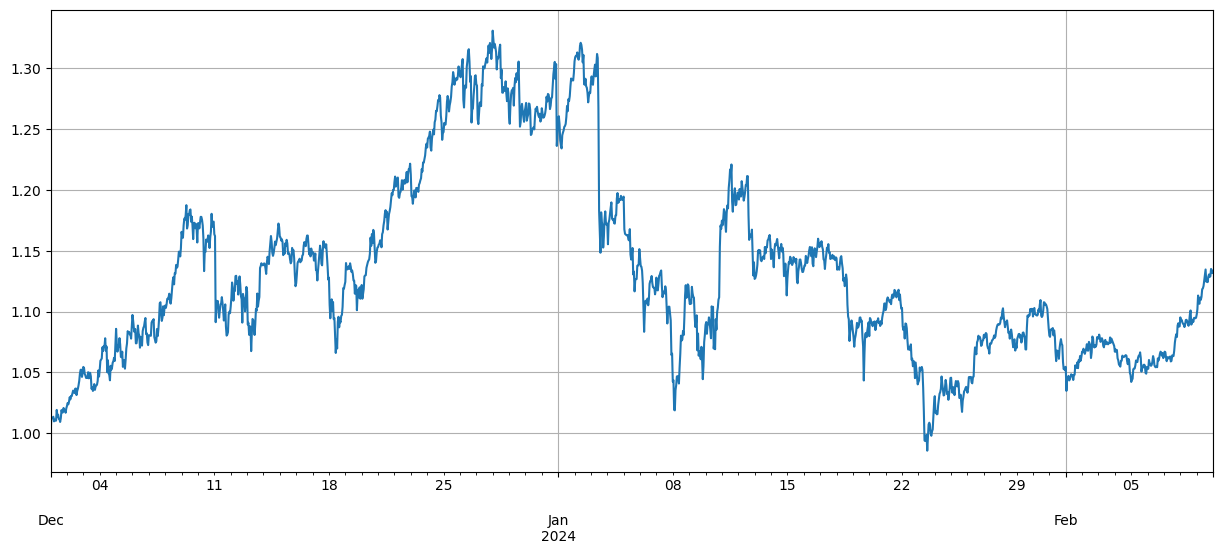

In [14]:
df_norm = df_close/df_close.fillna(method='bfill').iloc[0] #归一化
df_norm.mean(axis=1).plot(figsize=(15,6),grid=True);
#最终指数收益图


In [15]:
#回测引擎
class Exchange:
    
    def __init__(self, trade_symbols, fee=0.0004, initial_balance=10000):
        self.initial_balance = initial_balance #初始的资产
        self.fee = fee
        self.trade_symbols = trade_symbols
        self.account = {'USDT':{'realised_profit':0, 'unrealised_profit':0, 'total':initial_balance, 'fee':0, 'leverage':0, 'hold':0}}
        for symbol in trade_symbols:
            self.account[symbol] = {'amount':0, 'hold_price':0, 'value':0, 'price':0, 'realised_profit':0,'unrealised_profit':0,'fee':0}
            
    def Trade(self, symbol, direction, price, amount):
        
        cover_amount = 0 if direction*self.account[symbol]['amount'] >=0 else min(abs(self.account[symbol]['amount']), amount)
        open_amount = amount - cover_amount
        self.account['USDT']['realised_profit'] -= price*amount*self.fee #扣除手续费
        self.account['USDT']['fee'] += price*amount*self.fee
        self.account[symbol]['fee'] += price*amount*self.fee

        if cover_amount > 0: #先平仓
            self.account['USDT']['realised_profit'] += -direction*(price - self.account[symbol]['hold_price'])*cover_amount  #利润
            self.account[symbol]['realised_profit'] += -direction*(price - self.account[symbol]['hold_price'])*cover_amount
            
            self.account[symbol]['amount'] -= -direction*cover_amount
            self.account[symbol]['hold_price'] = 0 if self.account[symbol]['amount'] == 0 else self.account[symbol]['hold_price']
            
        if open_amount > 0:
            total_cost = self.account[symbol]['hold_price']*direction*self.account[symbol]['amount'] + price*open_amount
            total_amount = direction*self.account[symbol]['amount']+open_amount
            
            self.account[symbol]['hold_price'] = total_cost/total_amount
            self.account[symbol]['amount'] += direction*open_amount
                    
    
    def Buy(self, symbol, price, amount):
        self.Trade(symbol, 1, price, amount)
        
    def Sell(self, symbol, price, amount):
        self.Trade(symbol, -1, price, amount)
        
    def Update(self, close_price): #对资产进行更新
        self.account['USDT']['unrealised_profit'] = 0
        self.account['USDT']['hold'] = 0
        for symbol in self.trade_symbols:
            if not np.isnan(close_price[symbol]):
                self.account[symbol]['unrealised_profit'] = (close_price[symbol] - self.account[symbol]['hold_price'])*self.account[symbol]['amount']
                self.account[symbol]['price'] = close_price[symbol]
                self.account[symbol]['value'] = abs(self.account[symbol]['amount'])*close_price[symbol]
                self.account['USDT']['hold'] += self.account[symbol]['value']
                self.account['USDT']['unrealised_profit'] += self.account[symbol]['unrealised_profit']
        self.account['USDT']['total'] = round(self.account['USDT']['realised_profit'] + self.initial_balance + self.account['USDT']['unrealised_profit'],6)
        self.account['USDT']['leverage'] = round(self.account['USDT']['hold']/self.account['USDT']['total'],3)

#测试因子的函数
def Test(factor, symbols, period=1, N=40, value=300):
    e = Exchange(symbols, fee=0.0002, initial_balance=10000)
    res_list = []
    index_list = []
    factor = factor.dropna(how='all')
    for idx, row in factor.iterrows():
        if idx.hour % period == 0:
            buy_symbols =  row.sort_values().dropna()[0:N].index
            sell_symbols = row.sort_values().dropna()[-N:].index
            prices = df_close.loc[idx,]
            index_list.append(idx)
            for symbol in symbols:
                if symbol in buy_symbols and e.account[symbol]['amount'] <= 0:
                    e.Buy(symbol,prices[symbol],value/prices[symbol]-e.account[symbol]['amount'])
                if symbol in sell_symbols and e.account[symbol]['amount'] >= 0:
                    e.Sell(symbol,prices[symbol], value/prices[symbol]+e.account[symbol]['amount'])
            e.Update(prices)
            res_list.append([e.account['USDT']['total'],e.account['USDT']['hold']])
    return pd.DataFrame(data=res_list, columns=['total','hold'],index = index_list)


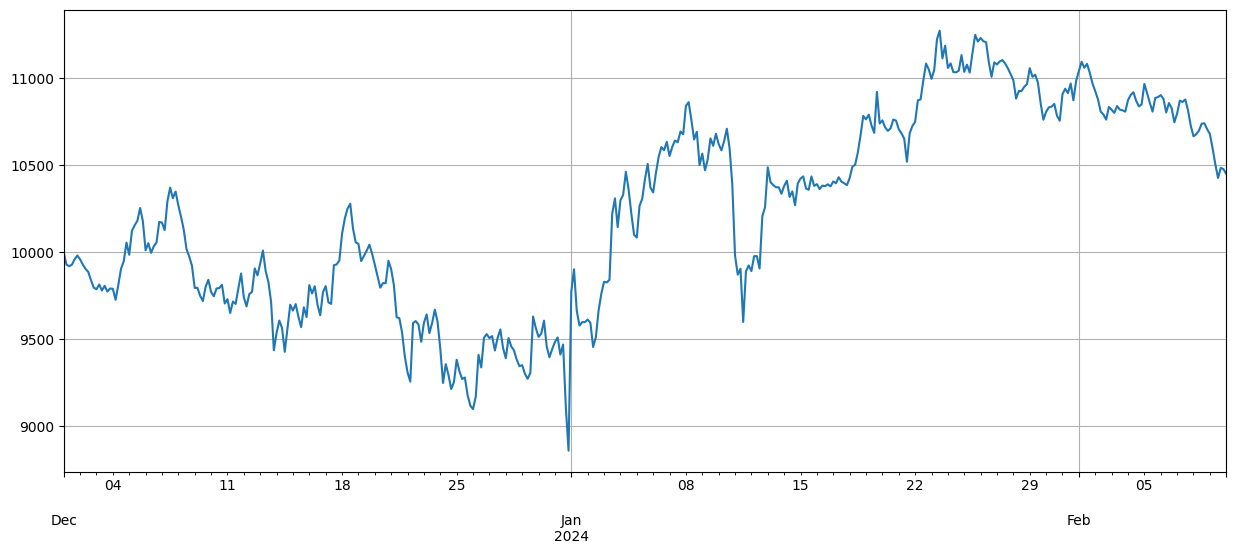

In [16]:
#成交量
factor_volume = df_volume
factor_volume_res = Test(factor_volume, symbols, period=4)
factor_volume_res.total.plot(figsize=(15,6),grid=True);


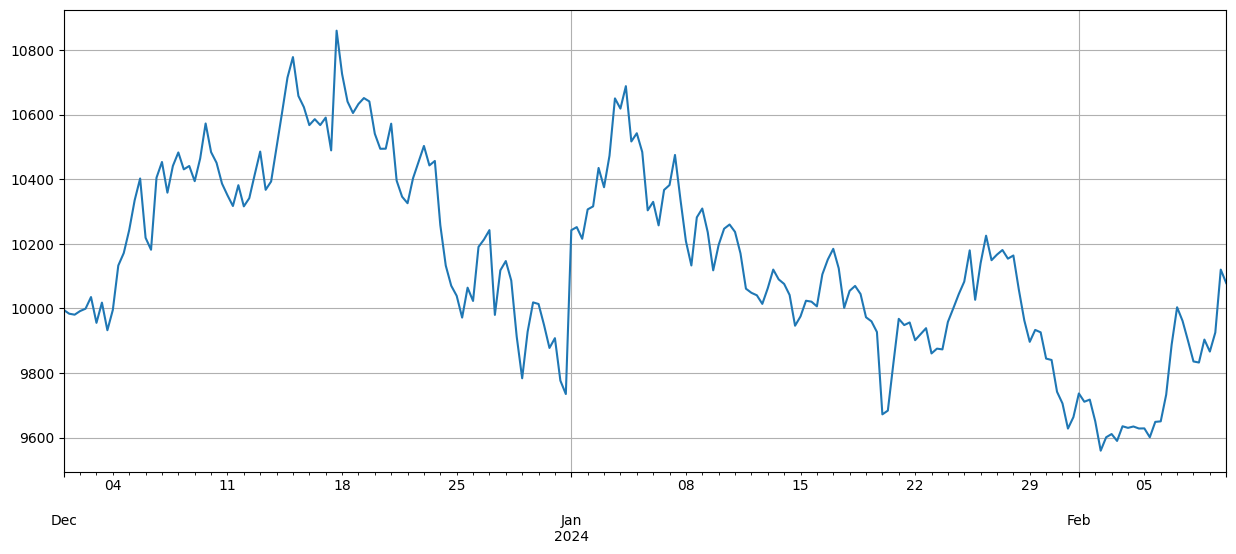

In [17]:
#成交价
factor_close = df_close
factor_close_res = Test(factor_close, symbols, period=8)
factor_close_res.total.plot(figsize=(15,6),grid=True);


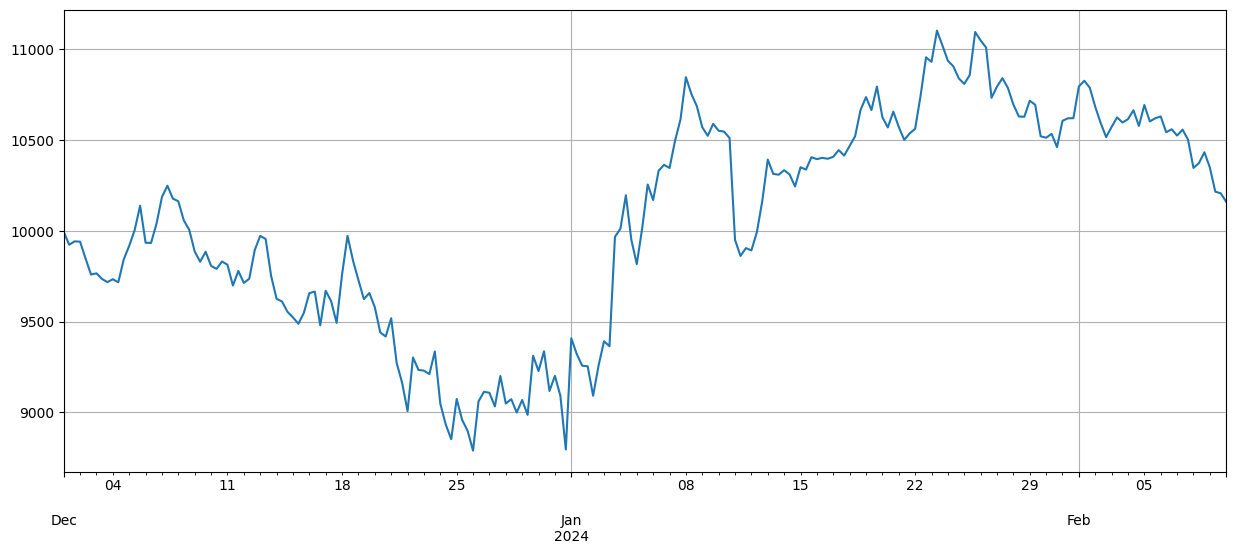

In [18]:
#成交笔数
factor_count = df_count
factor_count_res = Test(factor_count, symbols, period=8)
factor_count_res.total.plot(figsize=(15,6),grid=True);


In [19]:
print(df_count.corrwith(df_volume).mean())


0.9734905766678507


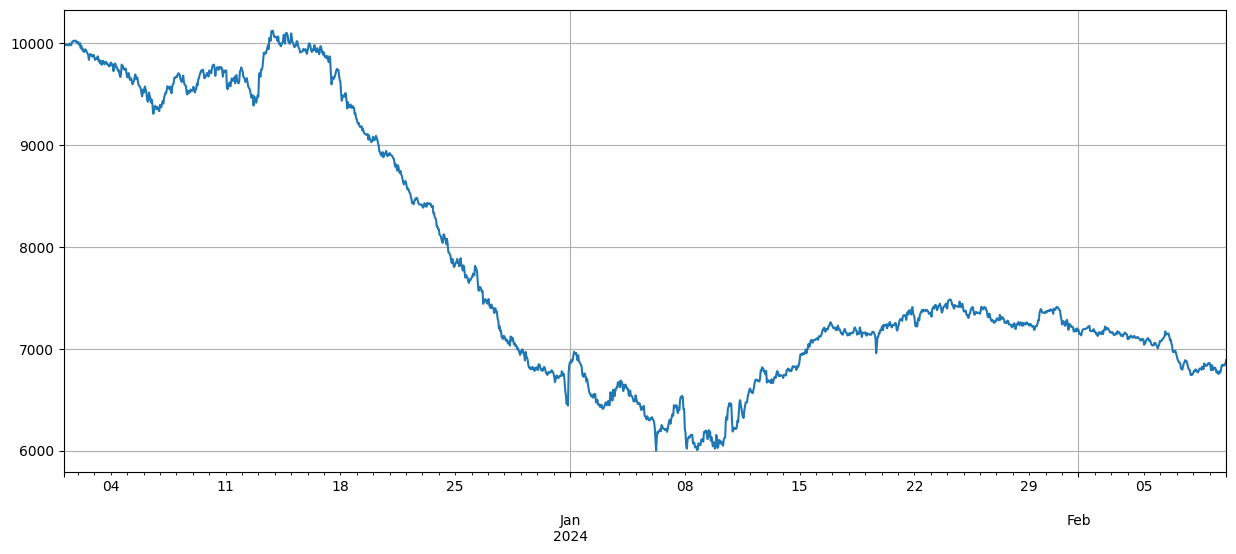

In [20]:
#3小时动量因子
factor_1 =  (df_close - df_close.shift(3))/df_close.shift(3)
factor_1_res = Test(factor_1,symbols,period=1, N = 40)
factor_1_res.total.plot(figsize=(15,6),grid=True);


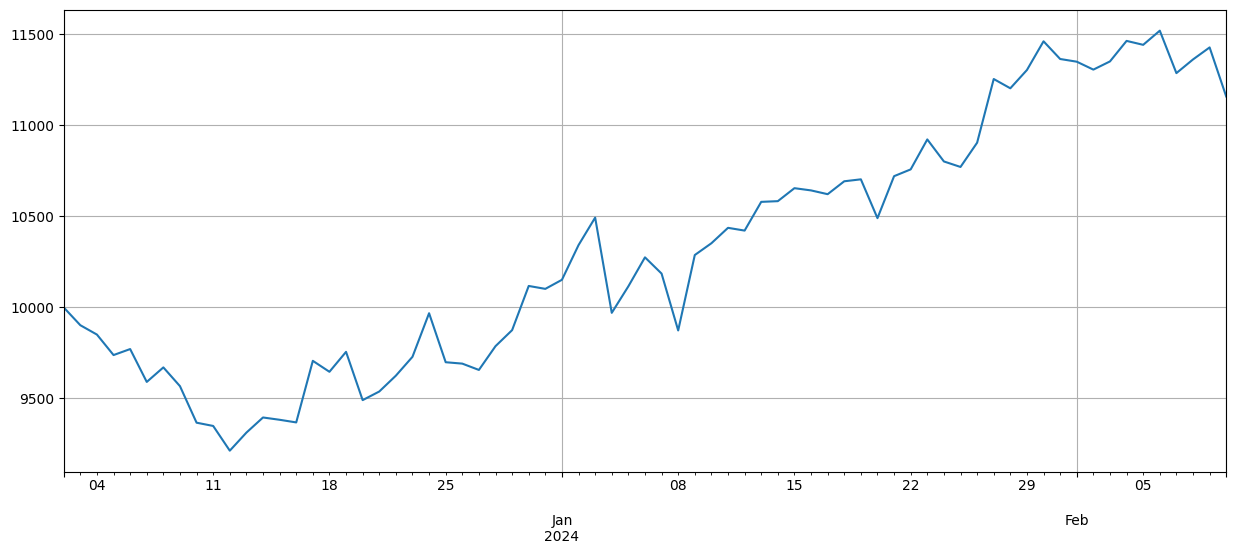

In [24]:
#24小时动量因子
factor_2 =  (df_close - df_close.shift(24))/df_close.shift(24)
factor_2_res = Test(factor_2,symbols,period=24, N=30)
factor_2_res.total.plot(figsize=(15,6),grid=True);


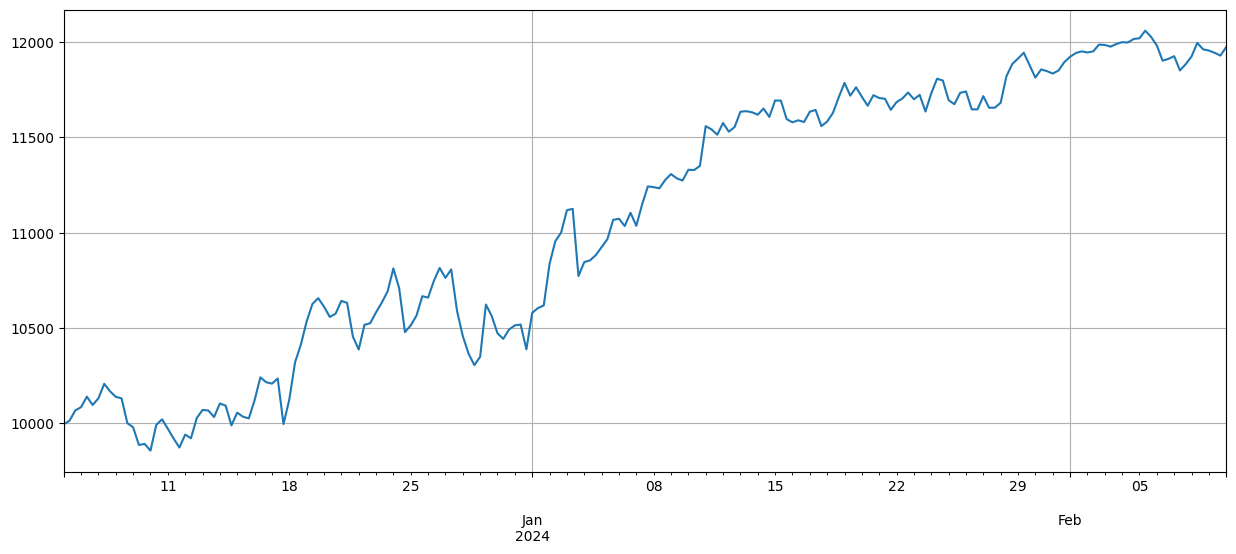

In [25]:
#成交额变动因子
factor_3 = df_volume.rolling(24).mean()/df_volume.rolling(96).mean()
factor_3_res = Test(factor_3, symbols, period=8)
factor_3_res.total.plot(figsize=(15,6),grid=True);


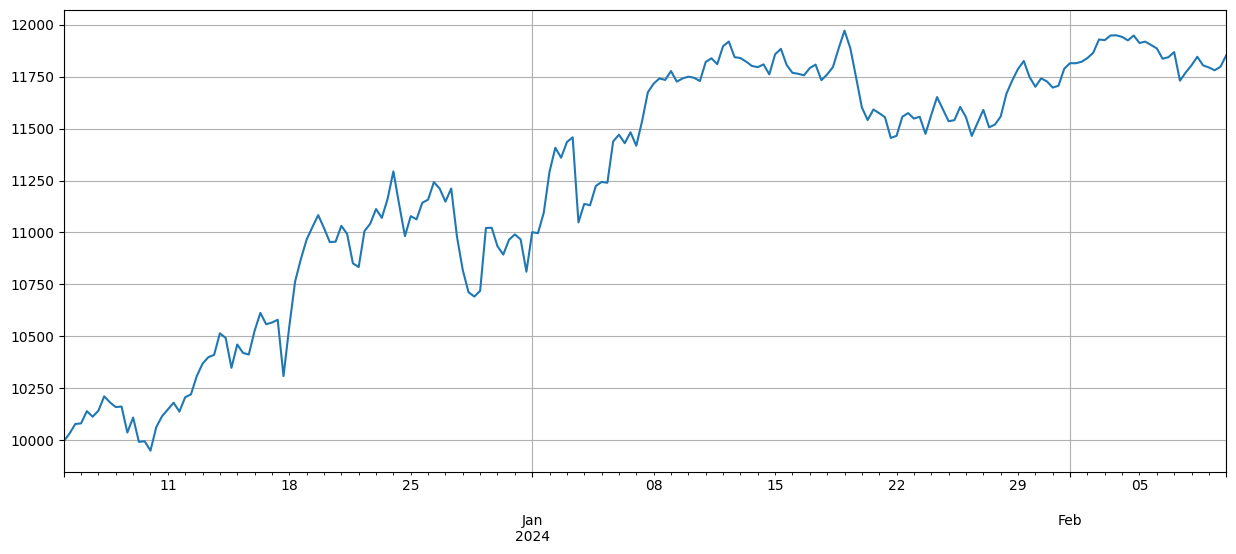

In [26]:
#成交笔数因子
factor_4 = df_count.rolling(24).mean()/df_count.rolling(96).mean()
factor_4_res = Test(factor_4, symbols, period=8)
factor_4_res.total.plot(figsize=(15,6),grid=True);


In [27]:
#因子相关性
print(factor_4.corrwith(factor_3).mean())


0.9798091005184876


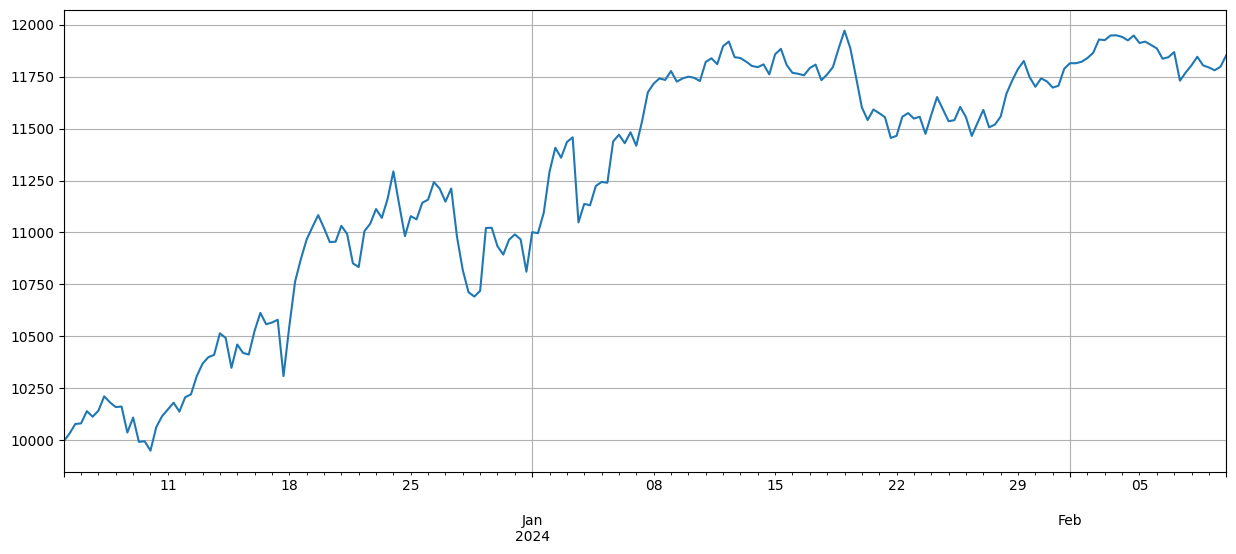

In [28]:
#单笔成交价值因子
factor_5 = -(df_volume.rolling(24).mean()/df_count.rolling(24).mean())/(df_volume.rolling(24).mean()/df_count.rolling(96).mean())
factor_5_res = Test(factor_5, symbols, period=8)
factor_5_res.total.plot(figsize=(15,6),grid=True);


In [29]:
print(factor_4.corrwith(factor_5).mean())


0.894229274978245


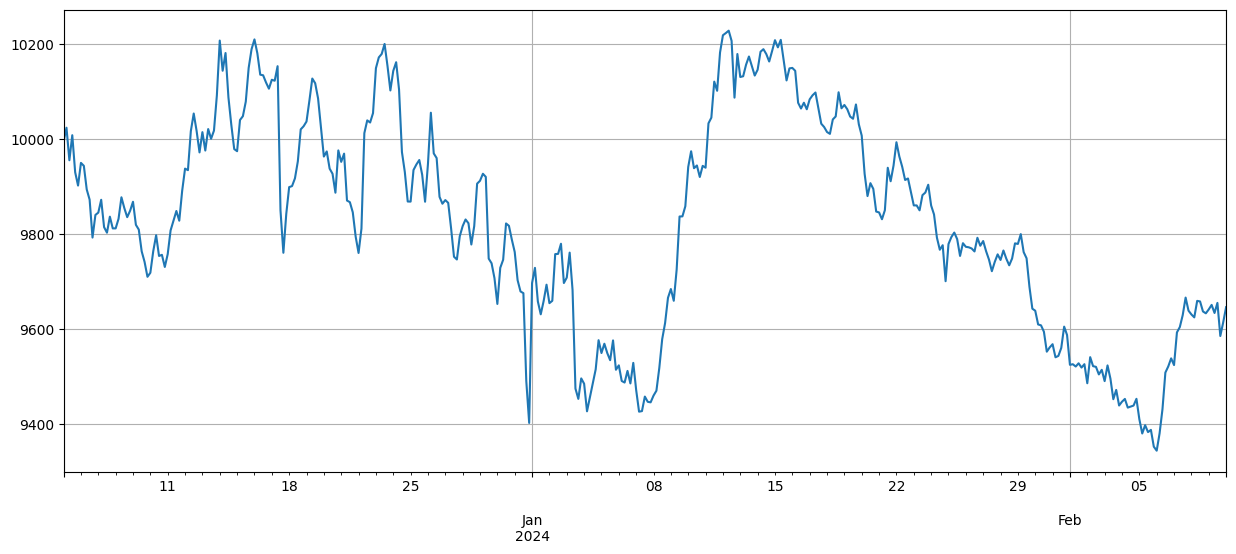

In [30]:
#主动成交比例因子
factor_6 = df_buy_ratio.rolling(24).mean()/df_buy_ratio.rolling(96).mean()
factor_6_res = Test(factor_6, symbols, period=4)
factor_6_res.total.plot(figsize=(15,6),grid=True);


In [31]:
print(factor_3.corrwith(factor_6).mean())


0.06850583172868109


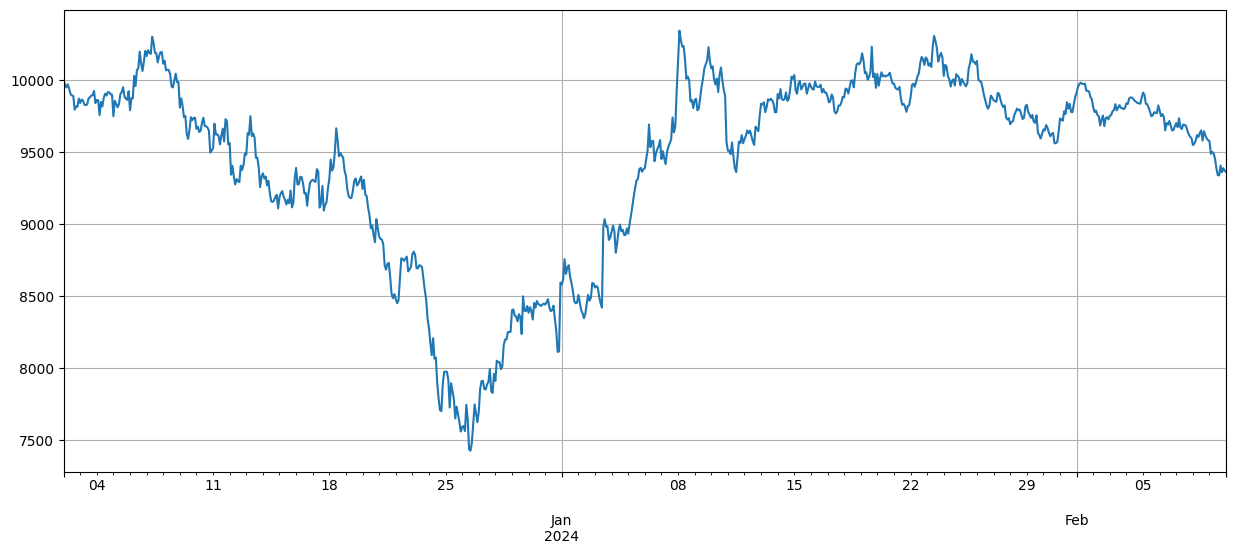

In [32]:
#波动率因子
factor_7 = (df_close/df_open).rolling(24).std()
factor_7_res = Test(factor_7, symbols, period=2)
factor_7_res.total.plot(figsize=(15,6),grid=True);


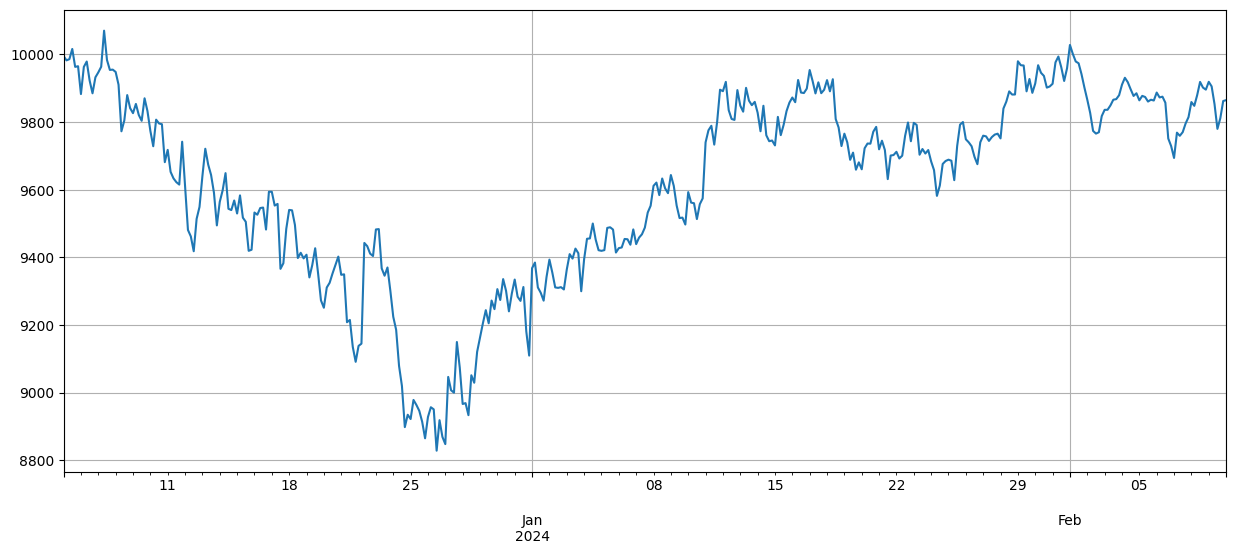

In [33]:
#成交量和收盘价相关性因子
factor_8 = df_close.rolling(96).corr(df_volume)
factor_8_res = Test(factor_8, symbols, period=4)
factor_8_res.total.plot(figsize=(15,6),grid=True);


In [38]:
#标准化函数，去除缺失值和极值，并且进行标准化处理
def norm_factor(factor):
    factor = factor.dropna(how='all')
    factor_clip = factor.apply(lambda x:x.clip(x.quantile(0.2), x.quantile(0.8)),axis=1)
    factor_norm = factor_clip.add(-factor_clip.mean(axis=1),axis ='index').div(factor_clip.std(axis=1),axis ='index')
    return factor_norm


df_volume_norm = norm_factor(df_volume)
factor_1_norm = norm_factor(factor_1)
factor_6_norm = norm_factor(factor_6)
factor_7_norm = norm_factor(factor_7)
factor_8_norm = norm_factor(factor_8)


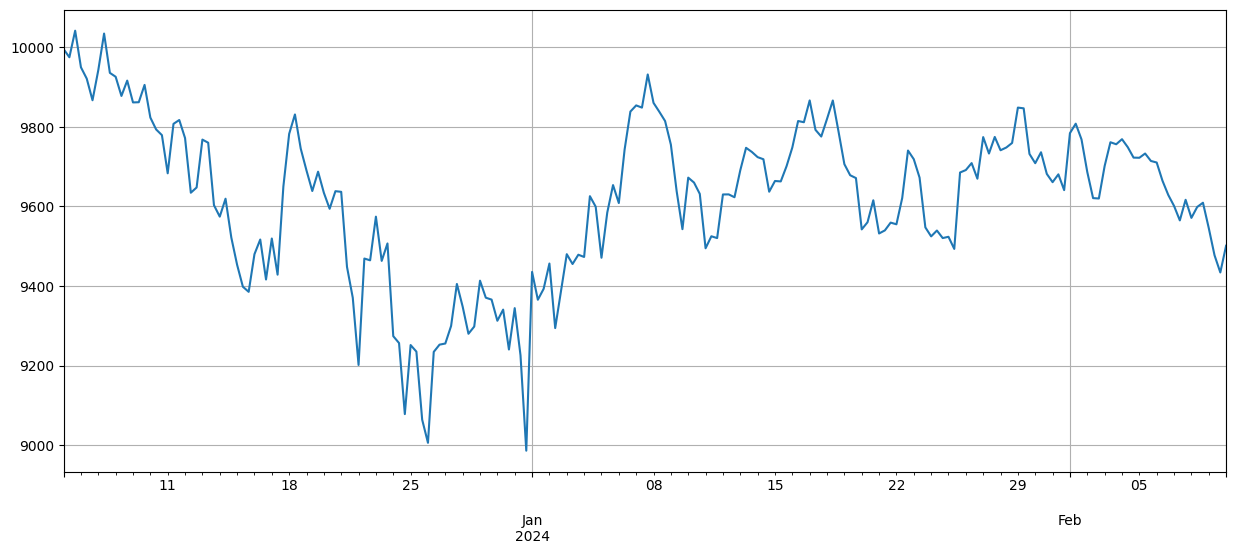

In [39]:
factor_total = 0.6*df_volume_norm + 0.4*factor_1_norm + 0.2*factor_6_norm + 0.3*factor_7_norm + 0.4*factor_8_norm
factor_total_res = Test(factor_total, symbols, period=8)
factor_total_res.total.plot(figsize=(15,6),grid=True);
